## 1. Obtain and review raw data
<p>After logging your run, the first step is to export the data from Runkeeper (which I've done already). Then import the data and start exploring to find potential problems. then create data cleaning strategies to fix the issues. Finally, analyze and visualize the clean time-series data.</p>
<p>I exported seven years worth of my training data, from 2012 through 2018. The data is a CSV file where each row is a single training activity. We Start by loading and inspecting it.</p>

In [2]:
import pandas as pd


runkeeper = r'c:\Users\adil\Documents\datacamp\4 - Analyze Your Runkeeper Fitness Dat\cardioActivities.csv'

# Create DataFrame with parse_dates and index_col parameters 
df_activities = pd.read_csv(runkeeper, parse_dates=['Date'], index_col='Date')


# First look at exported data: select sample of 3 random rows 
display(df_activities.sample(3))

# Print DataFrame summary
print(df_activities.info())

,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,
2017-06-12 18:25:58,ba13aabc-d722-4803-9c1f-4e5043ecced6,Running,NaN,12.67,1:05:58,5:12,11.53,893.0,128,148.0,NaN,TomTom MySports Watch,2017-06-12-182558.gpx
2013-07-03 07:20:00,e4d4f094-e32e-4518-8119-742667e662c4,Running,NaN,3.75,21:55,5:51,10.26,281.0,55,NaN,NaN,NaN,2013-07-03-072000.gpx
2014-02-13 18:08:01,e8c1276e-5ecd-4b6f-bc06-72bab7efcc29,Running,NaN,6.38,38:00,5:57,10.08,458.0,34,NaN,NaN,NaN,2014-02-13-180801.gpx


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:12 to 2012-08-22 18:53:54
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Id               508 non-null    object 
 1   Type                      508 non-null    object 
 2   Route Name                1 non-null      object 
 3   Distance (km)             508 non-null    float64
 4   Duration                  508 non-null    object 
 5   Average Pace              508 non-null    object 
 6   Average Speed (km/h)      508 non-null    float64
 7   Calories Burned           508 non-null    float64
 8   Climb (m)                 508 non-null    int64  
 9   Average Heart Rate (bpm)  294 non-null    float64
 10  Friend's Tagged           0 non-null      float64
 11  Notes                     231 non-null    object 
 12  GPX File                  504 non-null    object 
dtypes: float64(5), int64(1), obj

## 2. Data preprocessing
<p>Lucky for us, the column names Runkeeper provides are informative, and we don't need to rename any columns.</p>
<p>But, we do notice missing values using the <code>info()</code> method.
<p>We'll fill in missing values in the heart rate column to avoid misleading results later, but right now, our first data preprocessing steps will be to:</p>
<ul>
<li>Remove columns not useful for our analysis.</li>
<li>Replace the "Other" activity type to "Unicycling" because that was always the "Other" activity.</li>
<li>Count missing values.</li>
</ul>

In [3]:
# list of columns to be deleted
#cols_to_drop = ['Friend\'s Tagged','Route Name','GPX File','Activity Id','Calories Burned', 'Notes']
#df_activities = df_activities.drop(columns=cols_to_drop)

# Count types of training activities
display(df_activities['Type'].value_counts())

# Rename 'Other' type to 'Unicycling'
df_activities['Type'].replace({'Other': 'Unicycling'}, inplace=True)


# Count missing values for each column
df_activities.isnull().sum()


Type
Running    459
Cycling     29
Walking     18
Other        2
Name: count, dtype: int64

Activity Id                   0
Type                          0
Route Name                  507
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Calories Burned               0
Climb (m)                     0
Average Heart Rate (bpm)    214
Friend's Tagged             508
Notes                       277
GPX File                      4
dtype: int64

## 3. Dealing with missing values
<p>There are 214 missing entries for my average heart rate.</p>
<p>We can fill in the missing values with an average value (mean imputation). We need to consider that the average heart rate varies for different activities. We'll filter the DataFrames by activity type (<code>Type</code>) and calculate each activity's mean heart rate, then fill in the missing values with those means.</p>

In [4]:
#Calculateing sample means for heart rate for each training activity type 
avg_hr_run = df_activities[df_activities['Type'] == 'Running']['Average Heart Rate (bpm)'].mean()
avg_hr_cycle = df_activities[df_activities['Type'] == 'Cycling']['Average Heart Rate (bpm)'].mean()
avg_hr_walk= df_activities[df_activities['Type'] == 'Walking']['Average Heart Rate (bpm)'].mean()
avg_hr_unicycle = df_activities[df_activities['Type'] == 'Running']['Average Heart Rate (bpm)'].mean()

# Split whole DataFrame into several, specific for different activities
df_run = df_activities[df_activities['Type'] == 'Running'].copy()
df_walk = df_activities[df_activities['Type'] == 'Walking'].copy()
df_cycle = df_activities[df_activities['Type'] == 'Cycling'].copy()
df_unicycle = df_activities[df_activities['Type'] == 'Running'].copy()

# Filling missing values with counted means  
df_walk['Average Heart Rate (bpm)'].fillna(110, inplace=True)
df_run['Average Heart Rate (bpm)'].fillna(int(avg_hr_run), inplace=True)
df_cycle['Average Heart Rate (bpm)'].fillna(int(avg_hr_cycle), inplace=True)
df_unicycle['Average Heart Rate (bpm)'].fillna(int(avg_hr_unicycle), inplace=True)

# Count missing values for each column in running data
df_walk.isnull().sum()
df_run.isnull().sum()
df_cycle.isnull().sum()
df_unicycle.isnull().sum()

#df_run

Activity Id                   0
Type                          0
Route Name                  458
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Calories Burned               0
Climb (m)                     0
Average Heart Rate (bpm)      0
Friend's Tagged             459
Notes                       237
GPX File                      4
dtype: int64

## 4. Plot running data
<p>Now to create the first plot. Most of the activities in the data were running (459). There are only 29, 18, and two instances for cycling, walking, and unicycling, respectively. For now, let's focus on plotting the different running metrics.</p>
<p>An excellent first visualization is a figure with four subplots, one for each running metric (each numerical column). Each subplot will have a different y-axis, which is explained in each legend. The x-axis, <code>Date</code>, is shared among all subplots.</p>

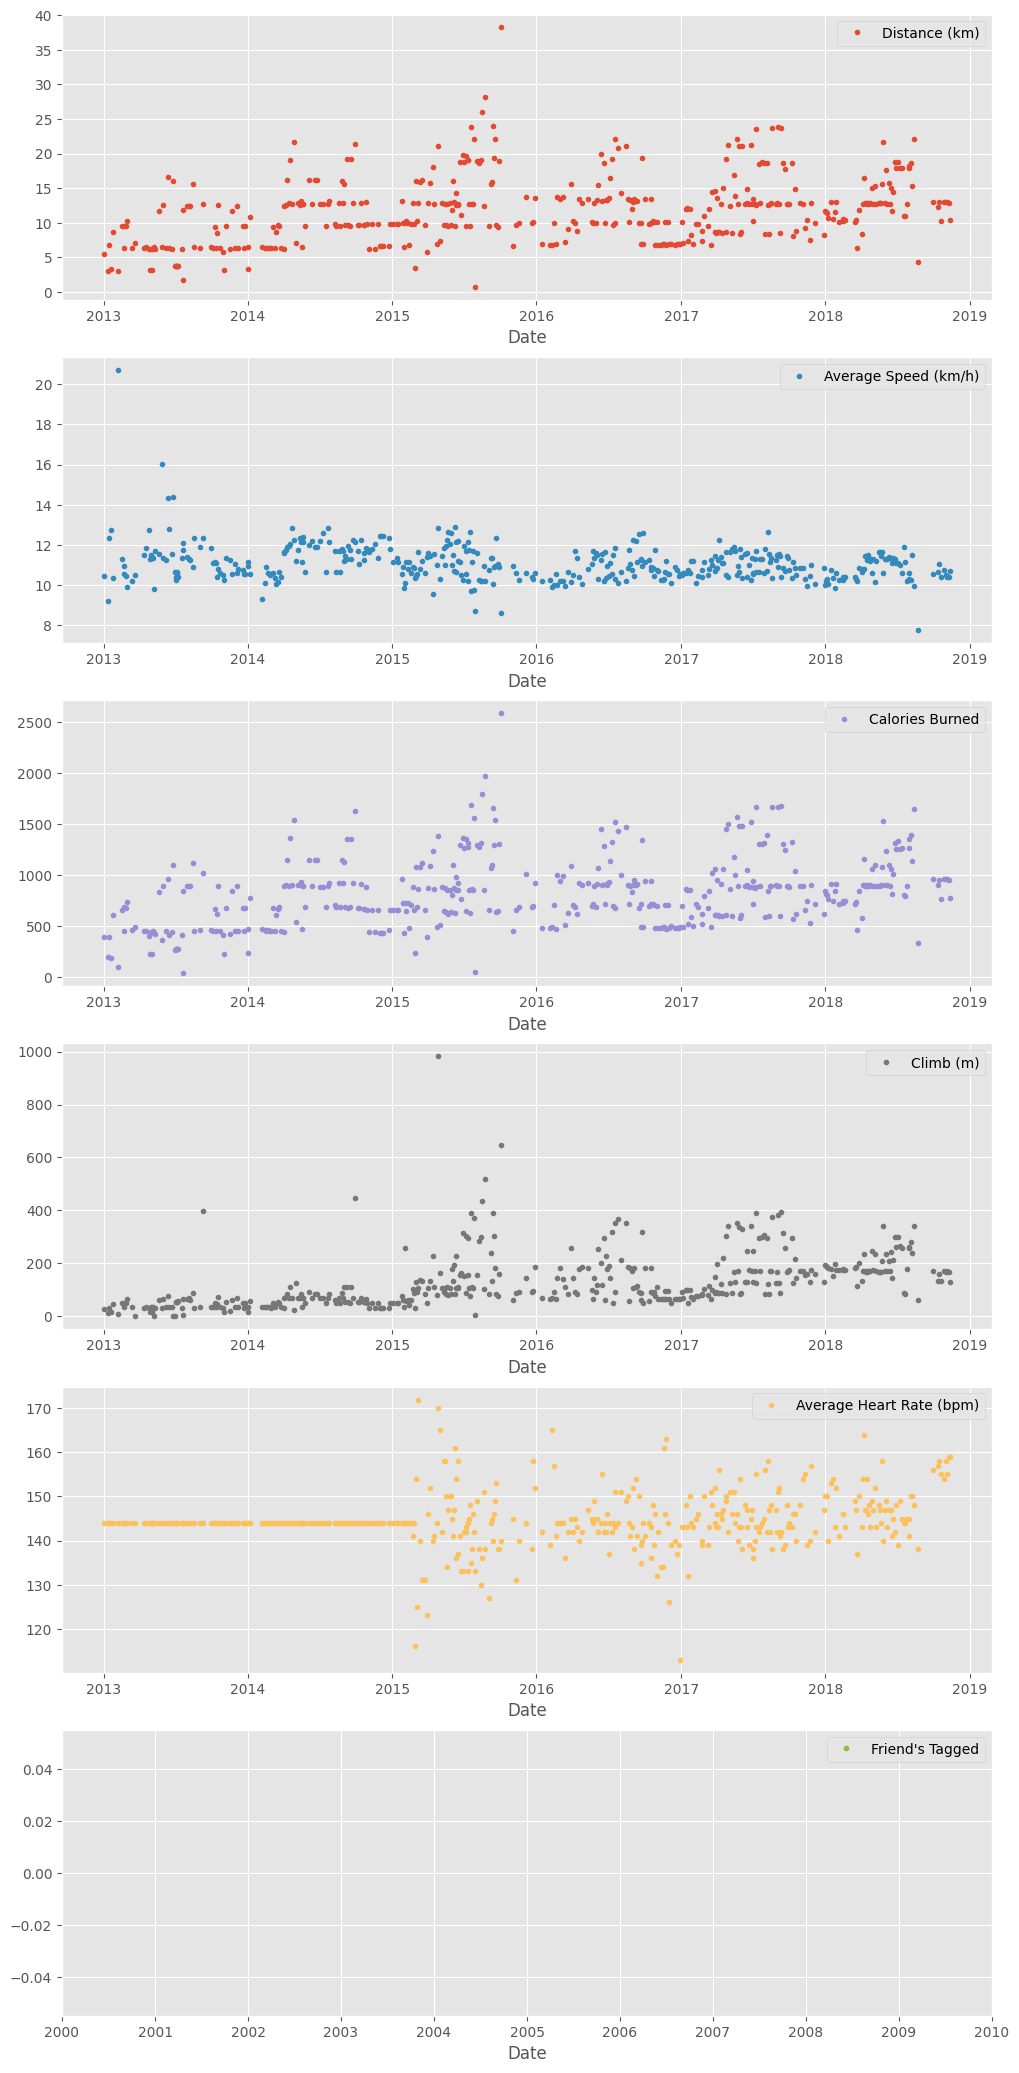

In [7]:
%matplotlib inline

# Import matplotlib, set style and ignore warning
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
plt.style.use('ggplot')
warnings.filterwarnings(
    action='ignore', module='matplotlib.figure', category=UserWarning,
    message=('This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.')
)


df_run = df_run.sort_index()

# Prepare data subsetting period from 2013 till 2018
runs_subset_2013_2018 = df_run['2013-01-01':'2018-12-31']

# Create, plot and customize in one step
runs_subset_2013_2018.plot(subplots=True,
                           sharex=False,
                           figsize=(12,26),
                           linestyle='none',
                           marker='o',
                           markersize=3,
                          )

plt.show()

## 5. Running statistics
<p>You'll commonly hear questions like:</p>
<ul>
<li>What is your average distance?</li>
<li>How fast do you run?</li>
<li>Do you measure your heart rate?</li>
<li>How often do you train?</li>
</ul>
<p>Well find the answers to these questions. If you look back at the plots, you can see the answer to, <em>Do you measure your heart rate?</em> Before 2015: no. To look at the averages, let's only use the data from 2015 through 2018.</p>
<p>In pandas, the <code>resample()</code> method is similar to the <code>groupby()</code> method - with <code>resample()</code> you group by a specific time span. We'll use <code>resample()</code> to group the time series data by a sampling period and apply several methods to each sampling period. In our case, we'll resample annually and weekly.</p>

In [5]:
# Prepare running data for the last 4 years
runs_subset_2015_2018 = df_run['2015-01-01':'2018-12-31']

# Calculate annual statistics
numeric_columns = runs_subset_2015_2018.select_dtypes(include=['number']).columns
annual_statistics = runs_subset_2013_2018[numeric_columns].resample('A').mean()

print('How my average run looks in last 4 years:')
display(annual_statistics)

# Calculate weekly statistics
weekly_statistics = runs_subset_2013_2018[numeric_columns].resample('W').mean()
print('Weekly averages of last 4 years:')
display(weekly_statistics)

# Mean weekly counts
weekly_counts_average = runs_subset_2013_2018.resample('W').count().mean()

print('How many trainings per week I had on average:', weekly_counts_average[1])

How my average run looks in last 4 years:


,Distance (km),Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged
Date,,,,,,
2013-12-31,7.549242,11.399545,528.030303,45.166667,144.000000,NaN
2014-12-31,10.953043,11.519130,775.333333,65.275362,144.000000,NaN
2015-12-31,13.602805,10.998902,932.906138,160.170732,143.353659,NaN
2016-12-31,11.411667,10.837778,796.152777,133.194444,143.388889,NaN
2017-12-31,12.935176,10.959059,914.164706,169.376471,145.247059,NaN
2018-12-31,13.339063,10.777969,952.359375,191.218750,148.125000,NaN


Weekly averages of last 4 years:


,Distance (km),Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged
Date,,,,,,
2013-01-06,5.470,10.440,392.0,28.0,144.0,NaN
2013-01-13,3.090,9.210,201.0,13.0,144.0,NaN
2013-01-20,5.055,12.545,294.0,23.5,144.0,NaN
2013-01-27,8.650,10.340,614.0,45.0,144.0,NaN
2013-02-03,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2018-10-14,12.620,10.840,928.0,146.5,157.5,NaN
2018-10-21,10.290,10.410,764.0,133.0,155.0,NaN
2018-10-28,13.020,10.730,967.0,170.0,154.0,NaN


How many trainings per week I had on average: 1.4313725490196079


C:\Users\adil\AppData\Local\Temp\ipykernel_15408\128798560.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('How many trainings per week I had on average:', weekly_counts_average[1])


## 6. Visualization with averages
<p>Let's plot the long term averages of distance run and heart rate with their raw data to visually compare the averages to each training session. Again, we'll use the data from 2015 through 2018.</p>
<p>In this task, we will use <code>matplotlib</code> functionality for plot creation and customization.</p>

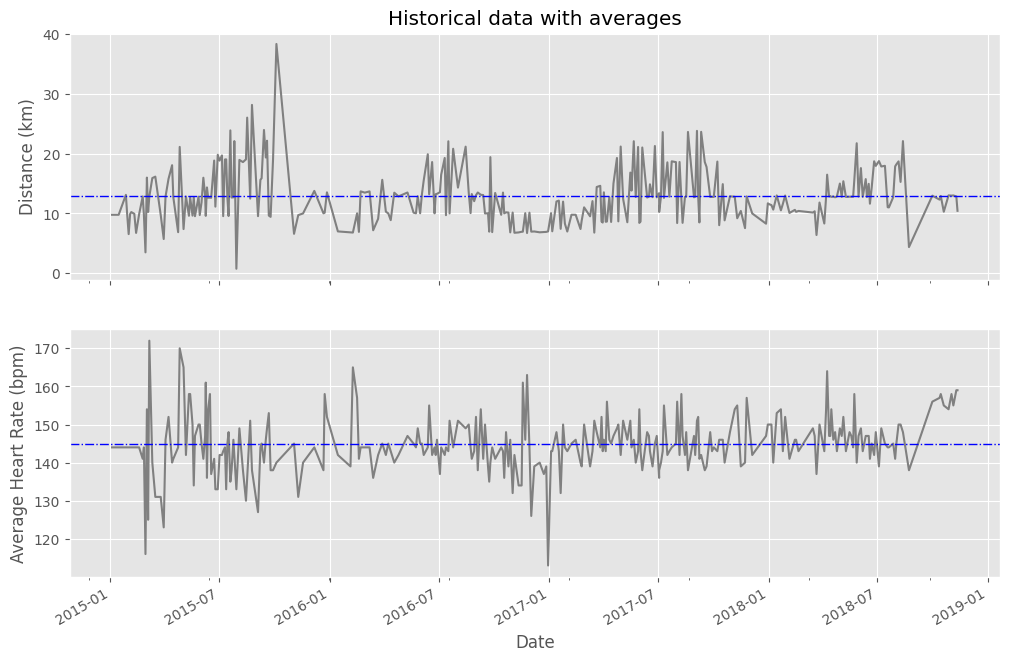

In [6]:
# Prepare data
runs_subset_2015_2018 = df_run['2015':'2018']
runs_distance = runs_subset_2015_2018['Distance (km)']
runs_hr = runs_subset_2015_2018['Average Heart Rate (bpm)']

# Create plot
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))

#Plot, customize first subplot
runs_distance.plot(ax=ax1, color='gray')
ax1.set(ylabel='Distance (km)', title='Historical data with averages')
ax1.axhline(runs_distance.mean(), color='blue', linewidth=1, linestyle='-.')

# Plot and customize second subplot
runs_hr.plot(ax=ax2, color='gray')
ax2.set(xlabel='Date', ylabel='Average Heart Rate (bpm)')
ax2.axhline(runs_hr.mean(), color='blue', linewidth=1, linestyle='-.')
# Show plot
plt.show()

## 7. Did we reach the goals?
<p>TYou could set a target goal of running 1000 km per year. Let's visualize the annual running distance (km) from 2013 through 2018 to see if we reached my goal each year. Only stars in the green region indicate success.</p>

<function matplotlib.pyplot.show(close=None, block=None)>

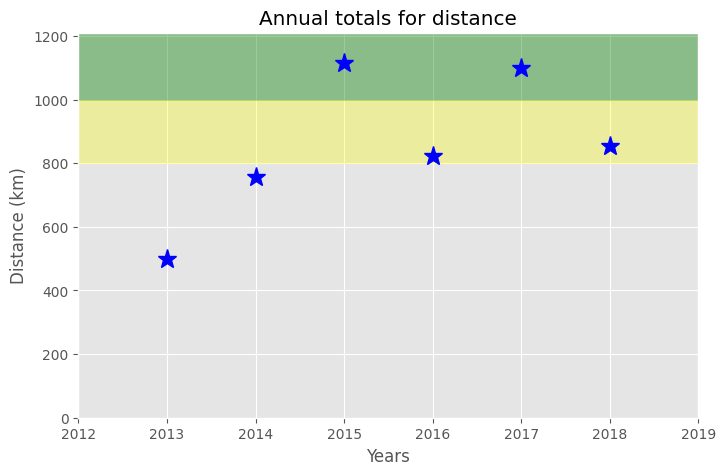

In [7]:
# Prepare data
df_run_dist_annual = df_run['2013':'2018']['Distance (km)'].resample('A').sum()


# Create plot
fig = plt.figure(figsize=(8, 5))

# Plot and customize
ax = df_run_dist_annual.plot(marker='*', markersize=14, linewidth=0, color='blue')
ax.set(ylim=[0, 1210], 
       xlim=['2012','2019'],
       ylabel='Distance (km)',
       xlabel='Years',
       title='Annual totals for distance')

ax.axhspan(1000, 1210, color='green', alpha=0.4)
ax.axhspan(800, 1000, color='yellow', alpha=0.3)

plt.show

## 8. Am I progressing?
<p>Let's dive a little deeper into the data to answer a tricky question: are we progressing in terms of my running skills? </p>
<p>To answer this question, we'll decompose my weekly distance run and visually compare it to the raw data. A red trend line will represent the weekly distance run.</p>
<p>We are going to use <code>statsmodels</code> library to decompose the weekly trend.</p>

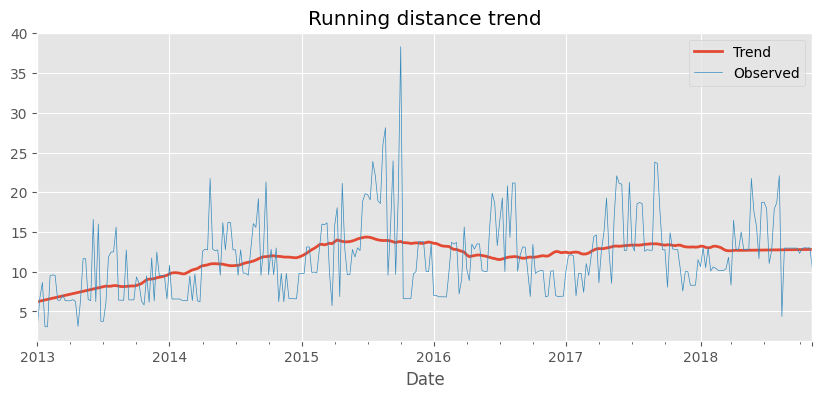

In [8]:
import statsmodels.api as sm

# Prepare data
df_run_dist_wkly =  df_run['2013':'2018']['Distance (km)'].resample('W').bfill()
decomposed = sm.tsa.seasonal_decompose(df_run_dist_wkly, extrapolate_trend=1, period=52)

# Create plot
fig =  plt.figure(figsize=(10, 4))

# Plot and customize
ax = decomposed.trend.plot(label='Trend', linewidth=2)
ax = decomposed.observed.plot(label='Observed', linewidth=0.5)

ax.legend()
ax.set_title('Running distance trend')

# Show plot
plt.show()

## 9. Training intensity
<p>Heart rate is a popular metric used to measure training intensity. Depending on age and fitness level, heart rates are grouped into different zones that people can target depending on training goals. A target heart rate during moderate-intensity activities is about 50-70% of maximum heart rate, while during vigorous physical activity it’s about 70-85% of maximum.</p>
<p>We'll create a distribution plot of my heart rate data by training intensity. It will be a visual presentation for the number of activities from predefined training zones. </p>

<function matplotlib.pyplot.show(close=None, block=None)>

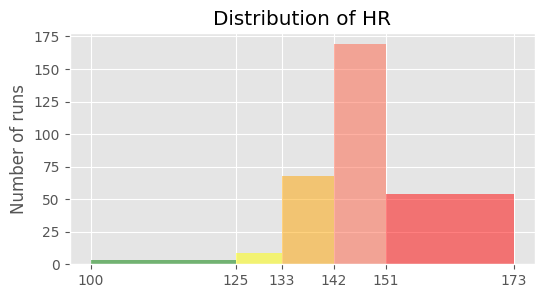

In [9]:
# Prepare data
hr_zones = [100, 125, 133, 142, 151, 173]
zone_names = ['Easy', 'Moderate', 'Hard', 'Very hard', 'Maximal']
zone_colors = ['green', 'yellow', 'orange', 'tomato', 'red']
df_run_hr_all = df_run['2015':'2018']['Average Heart Rate (bpm)']

# Create plot
fig, ax = plt.subplots(figsize=(6, 3))

# Plot and customize
n, bins, patches = ax.hist(df_run_hr_all, bins=hr_zones, alpha=0.5)
for i in range(0, len(patches)):
    patches[i].set_facecolor(zone_colors[i])

ax.set(title='Distribution of HR', ylabel='Number of runs')
ax.xaxis.set(ticks=hr_zones)

plt.show

## 10. Detailed summary report
<p>With all this data cleaning, analysis, and visualization, let's create detailed summary tables of the training. </p>
<p>To do this, we'll create two tables. The first table will be a summary of the distance (km) and climb (m) variables for each training activity. The second table will list the summary statistics for the average speed (km/hr), climb (m), and distance (km) variables for each training activity.</p>

In [10]:
# Concatenating three DataFrames
df_run_walk_cycle = pd.concat([df_run, df_walk, df_cycle]).sort_index(ascending=False)

dist_climb_cols, speed_col = ['Distance (km)', 'Climb (m)'], ['Average Speed (km/h)']

# Calculating total distance and climb in each type of activities
df_totals = df_run_walk_cycle.groupby('Type')[dist_climb_cols].sum()

print('Totals for different training types:')
display(df_totals)

# Calculating summary statistics for each type of activities 
df_summary = df_run_walk_cycle.groupby('Type')[dist_climb_cols + speed_col].describe()

# Combine totals with summary
for i in dist_climb_cols:
    df_summary[i, 'total'] = df_totals[i]

print('Summary statistics for different training types:')
df_summary


Totals for different training types:


,Distance (km),Climb (m)
Type,,
Cycling,680.58,6976
Running,5224.50,57278
Walking,33.45,349


Summary statistics for different training types:


Distance (km)                                                       \
                count       mean       std    min     25%     50%      75%   
Type                                                                         
Cycling          29.0  23.468276  9.451040  11.41  15.530  20.300  29.4000   
Running         459.0  11.382353  4.937853   0.76   7.415  10.810  13.1900   
Walking          18.0   1.858333  0.880055   1.22   1.385   1.485   1.7875   

               Climb (m)              ... Average Speed (km/h)             \
           max     count        mean  ...                count       mean   
Type                                  ...                                   
Cycling  49.18      29.0  240.551724  ...                 29.0  19.125172   
Running  38.32     459.0  124.788671  ...                459.0  11.056296   
Walking   4.29      18.0   19.388889  ...                 18.0   5.549444   

                                                        Distance (km)  \
              std    min     25%    50%      75%    max         total   
Type                                                                    
Cycling  3.257100  11.38  16.980  19.50  21.4900  24.33        680.58   
Running  0.953273   5.77  10.495  10.98  11.5200  20.72       5224.50   
Walking  1.459309   1.04   5.555   5.97   6.5125   6.91         33.45   

        Climb (m)  
            total  
Type               
Cycling      6976  
Running     57278  
Walking       349  

[3 rows x 26 columns]